In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [ ]:
!mkdir input_images

mkdir: cannot create directory ‘input_images’: File exists


In [ ]:
!tar -xvf  "drive/MyDrive/Colab Notebooks/words.tar" -C 'input_images'

Streaming output truncated to the last 5000 lines.
r06/r06-137/r06-137-05-08.png
r06/r06-137/r06-137-05-09.png
r06/r06-137/r06-137-05-10.png
r06/r06-137/r06-137-05-11.png
r06/r06-137/r06-137-06-00.png
r06/r06-137/r06-137-06-01.png
r06/r06-137/r06-137-06-02.png
r06/r06-137/r06-137-06-03.png
r06/r06-137/r06-137-06-04.png
r06/r06-137/r06-137-06-05.png
r06/r06-137/r06-137-06-06.png
r06/r06-137/r06-137-06-07.png
r06/r06-137/r06-137-06-08.png
r06/r06-137/r06-137-07-00.png
r06/r06-137/r06-137-07-01.png
r06/r06-137/r06-137-07-02.png
r06/r06-137/r06-137-07-03.png
r06/r06-137/r06-137-07-04.png
r06/r06-137/r06-137-07-05.png
r06/r06-137/r06-137-07-06.png
r06/r06-137/r06-137-07-07.png
r06/r06-137/r06-137-07-08.png
r06/r06-137/r06-137-07-09.png
r06/r06-137/r06-137-07-10.png
r06/r06-137/r06-137-07-11.png
r06/r06-137/r06-137-07-12.png
r06/r06-137/r06-137-08-00.png
r06/r06-137/r06-137-08-01.png
r06/r06-137/r06-137-08-02.png
r06/r06-137/r06-137-08-03.png
r06/r06-137/r06-137-08-04.png
r06/r06-137/r06-137

In [ ]:
!cp "drive/MyDrive/Colab Notebooks/words.txt" "/content/words.txt"
#or f = open("drive/MyDrive/Colab Notebooks/words.txt")

In [ ]:
import numpy as np
with open("/content/words.txt") as f:
        # go through each line
    for line in f:
            # if a line is empty or commented with #, ignore that line
            if not line or line.startswith('#'):
                continue
            #print(line)
            lines=[line]
            lines+=f.readlines()
''''f = open("/content/words.txt")
for line in f:
            # if a line is empty or commented with #, ignore that line
            if not line or line.startswith('#'):
                continue
            print(line)
            label_txt=[line]
            label_txt+= f.readlines()
f.close()'''

'\'f = open("/content/words.txt")\nfor line in f:\n            # if a line is empty or commented with #, ignore that line\n            if not line or line.startswith(\'#\'):\n                continue\n            print(line)\n            label_txt=[line]\n            label_txt+= f.readlines()\nf.close()'

In [ ]:
data_location="/content/input_images/"
def get_path(lines):

  # in the text file, each line is seperated with '\n', so `strip` first
  # then string like 'a01-000u-00-00 ok 154 408 768 27 51 AT A' has to split to a list by spaces
  line_split = lines.strip().split(' ')
  text = line_split[-1].replace("\n","")
            
  # the first item of the list contains path information, so split that by '-'
  directory_split = line_split[0].split('-')
  status=line_split[1]
            
  # now use all the above and concatenate to a string to make a path to an image
  image_location = f'{data_location}/{directory_split[0]}/{directory_split[0]}-{directory_split[1]}/{line_split[0]}.png'
  return image_location , text,status
get_path(lines[0])

('/content/input_images//a01/a01-000u/a01-000u-00-00.png', 'A', 'ok')

Read the parser.txt file containingthe image id and the respective word for that image

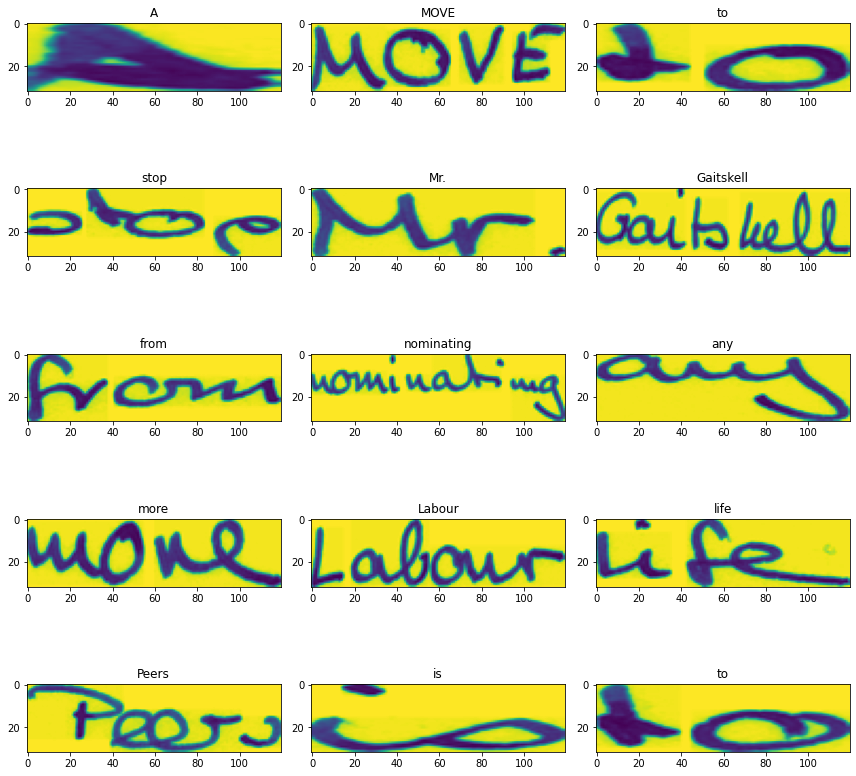

In [ ]:

import matplotlib.pyplot as plt
from PIL import Image


plt.figure(figsize=(12, 12))
for i in range(0, 15):
    plt.subplot(5, 3, i+1)
    path , title,status = get_path(lines[i])
    im = Image.open(path)
    im = im.resize((120,32))
    plt.title(title)
    plt.imshow(im)
        
plt.tight_layout()
plt.show()

Create a list of all characters and use the character’s index to encode the actual words into digits

In [ ]:
max_label_len = 0

chars = "ABCDEFGHIJKLMNOPQRSTUVWXYZ abcdefghijklmnopqrstuvwxyz1234567890-=!@#$%^&*()_+,\"./<>?;':[]\{}|`~"
print(chars, len(chars))

#encode each output word into digits
def label_encoder(txt):
    dig_list = []

    for index, char in enumerate(txt):
        dig_list.append(chars.index(char))

    return dig_list

ABCDEFGHIJKLMNOPQRSTUVWXYZ abcdefghijklmnopqrstuvwxyz1234567890-=!@#$%^&*()_+,"./<>?;':[]\{}|`~ 95


In [ ]:
label_encoder('Peers')

[15, 31, 31, 44, 45]

resizing all  images to have the same shape-(128,32))
and 
normalizing the images so that the pixel values are in range 0 to 1

In [ ]:
import cv2
for i in range(3):
  path , title,status = get_path(lines[i])
  if status == 'ok':
    img = cv2.imread(path, 0)
    img1 = cv2.imread(path, cv2.IMREAD_GRAYSCALE)
    print(img)
    if np.array_equal(img, img1):
      print(True)

[[249 249 246 ... 251 251 251]
 [250 249 231 ... 251 251 251]
 [245 241 216 ... 251 251 251]
 ...
 [123 202 234 ...  94 194 233]
 [142 218 240 ... 158 230 241]
 [163 233 241 ... 221 237 242]]
True
[[255 255 255 ... 244 247 250]
 [255 255 255 ... 233 236 241]
 [251 251 251 ... 160 197 217]
 ...
 [108  77  75 ... 255 255 255]
 [106  82  84 ... 255 255 255]
 [174 121 146 ... 255 255 255]]
True
[[251 251 251 ... 255 255 255]
 [251 251 251 ... 255 255 255]
 [251 250 246 ... 255 255 255]
 ...
 [255 255 255 ... 246 245 249]
 [255 255 255 ... 247 244 247]
 [255 255 255 ... 251 251 251]]
True


In [ ]:
import cv2
for i in range(1):
  path , title,status = get_path(lines[i])
  if status == 'ok':
    img = cv2.imread(path, cv2.IMREAD_GRAYSCALE)
    try:
      w, h = img.shape
      print(w,h)
      #aspect ratio calculation
      new_w = 32
      new_h = int(h * (new_w / w))
      img = cv2.resize(img, (new_h, new_w))
      w, h = img.shape
      print(w,h)
      img = img.astype('float32')
      print(img.shape,img[:5])
    except:
      continue

51 27
32 16
(32, 16) [[249. 240. 153.  92. 105. 209. 244. 247. 249. 251. 251. 251. 251. 251.
  251. 251.]
 [244. 214.  87.  65.  71. 114. 234. 249. 249. 251. 251. 251. 250. 251.
  251. 251.]
 [243. 187.  77.  72.  74.  78. 213. 246. 249. 251. 251. 250. 250. 251.
  251. 251.]
 [243. 197.  78.  67.  64.  66. 169. 243. 248. 250. 250. 251. 251. 251.
  251. 251.]
 [243. 219.  92.  60.  62.  58. 118. 233. 244. 249. 250. 251. 251. 251.
  251. 251.]]


In [ ]:
a=np.full((32,128-16),255)
a,a.shape

(array([[255, 255, 255, ..., 255, 255, 255],
        [255, 255, 255, ..., 255, 255, 255],
        [255, 255, 255, ..., 255, 255, 255],
        ...,
        [255, 255, 255, ..., 255, 255, 255],
        [255, 255, 255, ..., 255, 255, 255],
        [255, 255, 255, ..., 255, 255, 255]]), (32, 112))

In [ ]:
img=np.concatenate((img,a),axis=1)

In [ ]:
img[:5],img.shape

(array([[249., 240., 153.,  92., 105., 209., 244., 247., 249., 251., 251.,
         251., 251., 251., 251., 251., 255., 255., 255., 255., 255., 255.,
         255., 255., 255., 255., 255., 255., 255., 255., 255., 255., 255.,
         255., 255., 255., 255., 255., 255., 255., 255., 255., 255., 255.,
         255., 255., 255., 255., 255., 255., 255., 255., 255., 255., 255.,
         255., 255., 255., 255., 255., 255., 255., 255., 255., 255., 255.,
         255., 255., 255., 255., 255., 255., 255., 255., 255., 255., 255.,
         255., 255., 255., 255., 255., 255., 255., 255., 255., 255., 255.,
         255., 255., 255., 255., 255., 255., 255., 255., 255., 255., 255.,
         255., 255., 255., 255., 255., 255., 255., 255., 255., 255., 255.,
         255., 255., 255., 255., 255., 255., 255., 255., 255., 255., 255.,
         255., 255., 255., 255., 255., 255., 255.],
        [244., 214.,  87.,  65.,  71., 114., 234., 249., 249., 251., 251.,
         251., 250., 251., 251., 251., 255., 255

In [ ]:
img = cv2.subtract(255, img)
img[:5]

array([[  6.,  15., 102., 163., 150.,  46.,  11.,   8.,   6.,   4.,   4.,
          4.,   4.,   4.,   4.,   4.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.],
       [ 11.,  41., 168., 190., 184., 141.,  21.,   6.,   6.,   4.,   4.,
          4.,   5.,   4.,   4.,   4.,   0.,   0.,   0.,   0.,

In [ ]:
img.shape

(32, 128)

In [ ]:
img=np.expand_dims(img,axis=2)
img[:5]

array([[[  6.],
        [ 15.],
        [102.],
        [163.],
        [150.],
        [ 46.],
        [ 11.],
        [  8.],
        [  6.],
        [  4.],
        [  4.],
        [  4.],
        [  4.],
        [  4.],
        [  4.],
        [  4.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        

In [ ]:
img=img/255
img[:5]

array([[[0.02352941],
        [0.05882353],
        [0.4       ],
        [0.63921569],
        [0.58823529],
        [0.18039216],
        [0.04313725],
        [0.03137255],
        [0.02352941],
        [0.01568627],
        [0.01568627],
        [0.01568627],
        [0.01568627],
        [0.01568627],
        [0.01568627],
        [0.01568627],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0

In [ ]:
a=np.random.randint(255,size=(2,3))
a

array([[145,  11,  17],
       [ 74,  39,  92]])

In [ ]:
b=a/255
b

array([[0.56862745, 0.04313725, 0.06666667],
       [0.29019608, 0.15294118, 0.36078431]])

In [ ]:
import cv2
for i in range(1):
  path , title,status = get_path(lines[i])
  if status == 'ok':
    img = cv2.imread(path, cv2.IMREAD_GRAYSCALE)
    try:
      w, h = img.shape
      print(w,h)
      #aspect ratio calculation
      new_w = 32
      new_h = int(h * (new_w / w))
      img = cv2.resize(img, (new_h, new_w))
      w, h = img.shape
      print(w,h)
      img = img.astype('float32')
      if (w < 32):
        add_zeros = np.full((32-w, h), 255)
        img = np.concatenate((img, add_zeros))
        w, h = img.shape
    
      if (h < 128):
        add_zeros = np.full((w, 128-h), 255)
        img = np.concatenate((img, add_zeros), axis=1)
        w, h = img.shape
        print(w,h)
    except:
      continue

51 27
32 16
32 128


In [ ]:
np.full((2,3), 255)

array([[255, 255, 255],
       [255, 255, 255]])

In [ ]:
def process_image(img):
    w, h = img.shape

    #aspect ratio calculation
    new_w = 32
    new_h = int(h * (new_w / w))
    img = cv2.resize(img, (new_h, new_w))
    w, h = img.shape
    
    img = img.astype('float32')
    
    #convert each to (32, 128, 1)
    if (w < 32):
        add_zeros = np.full((32-w, h), 255)
        img = np.concatenate((img, add_zeros))
        w, h = img.shape
    
    if (h < 128):
        add_zeros = np.full((w, 128-h), 255)
        img = np.concatenate((img, add_zeros), axis=1)
        w, h = img.shape
        
    else:
      
        dim = (128,32)
        img = cv2.resize(img, dim)
    
    img = cv2.subtract(255, img)
    img = np.expand_dims(img, axis=2)
    
    #normalize 
    img = img / 255

    return img

Split dataset for training and testing

In [ ]:
import cv2
RECORDS_COUNT = 12000
#lists for training dataset
train_images = []
train_labels = []
train_input_length = []
train_label_length = []
train_original_text = []

#lists for validation dataset
valid_images = []
valid_labels = []
valid_input_length = []
valid_label_length = []
valid_original_text = []
y = []
for i in range(len(lines)):
  path , title,status = get_path(lines[i])
  if status == 'ok':
    img = cv2.imread(path, cv2.IMREAD_GRAYSCALE)
    try:
      img = process_image(img)
    except:
      continue
    try:
      label = label_encoder(title)
    except:
      continue
    if len(title) > max_label_len:
            max_label_len = len(title)  
    if (i % 10) == 0:
      valid_images.append(img)
      valid_labels.append(label)
      valid_input_length.append(31)
      valid_label_length.append(len(title))
      valid_original_text.append(title)
    else:
      train_images.append(img)
      train_labels.append(label)
      train_input_length.append(31)
      train_label_length.append(len(title))
      train_original_text.append(title)

  if i >= RECORDS_COUNT:
        break

In [ ]:
#valid_input_length[:5]
#set(valid_input_length)

[31, 31, 31, 31, 31]

In [ ]:
len(train_images),len(valid_images)

(9481, 1055)

Pad all the words to have a similar length

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Dense, LSTM, Reshape, BatchNormalization, Input, Conv2D, MaxPool2D, Lambda, Bidirectional


train_padded_label = pad_sequences(train_labels, maxlen=max_label_len, padding='post', value=len(chars))
valid_padded_label = pad_sequences(valid_labels, maxlen=max_label_len, padding='post', value=len(chars))

train_padded_label.shape, valid_padded_label.shape
#If you rather want to pad to the end of the sequences you can set padding='post'.

((9481, 16), (1055, 16))

In [ ]:
train_labels[:10]

[[12, 14, 21, 4],
 [46, 41],
 [45, 46, 41, 42],
 [12, 44, 79],
 [6, 27, 35, 46, 45, 37, 31, 38, 38],
 [32, 44, 41, 39],
 [40, 41, 39, 35, 40, 27, 46, 35, 40, 33],
 [27, 40, 51],
 [39, 41, 44, 31],
 [38, 35, 32, 31]]

In [ ]:
train_padded_label

array([[12, 14, 21, ..., 95, 95, 95],
       [46, 41, 95, ..., 95, 95, 95],
       [45, 46, 41, ..., 95, 95, 95],
       ...,
       [48, 35, 45, ..., 95, 95, 95],
       [35, 40, 95, ..., 95, 95, 95],
       [46, 34, 31, ..., 95, 95, 95]], dtype=int32)

In [ ]:
#convert to np array
train_images = np.asarray(train_images)
train_input_length = np.asarray(train_input_length)
train_label_length = np.asarray(train_label_length)

valid_images = np.asarray(valid_images)
valid_input_length = np.asarray(valid_input_length)
valid_label_length = np.asarray(valid_label_length)

train_images.shape, valid_images.shape

((9481, 32, 128, 1), (1055, 32, 128, 1))

In [ ]:
train_images[:2],train_images.shape

(array([[[[0.        ],
          [0.        ],
          [0.        ],
          ...,
          [0.07454044],
          [0.05291054],
          [0.03244485]],
 
         [[0.01176471],
          [0.01691177],
          [0.08495711],
          ...,
          [0.42573529],
          [0.29509804],
          [0.14846814]],
 
         [[0.01632966],
          [0.0705576 ],
          [0.3791973 ],
          ...,
          [0.79822302],
          [0.76985294],
          [0.64978552]],
 
         ...,
 
         [[0.58462012],
          [0.72549021],
          [0.64399511],
          ...,
          [0.        ],
          [0.        ],
          [0.        ]],
 
         [[0.61277574],
          [0.67423409],
          [0.4467831 ],
          ...,
          [0.        ],
          [0.        ],
          [0.        ]],
 
         [[0.43174019],
          [0.453125  ],
          [0.14678308],
          ...,
          [0.        ],
          [0.        ],
          [0.        ]]],
 
 
        [

In [ ]:
import tensorflow as tf 
from tensorflow.keras import layers , models
import tensorflow.keras.backend as K
from tensorflow.keras.models import Model
from tensorflow.keras.callbacks import ModelCheckpoint

# def ReshapeLayer(x):
    
#     shape = x.shape
    
#     # 1 possibility: H,W*channel
#     # reshape = layers.Reshape((shape[1],shape[2]*shape[3]))(x)
    
#     # 2 possibility: W,H*channel
#     transpose = layers.Permute((2,1,3))(x)
#     reshape = layers.Reshape((shape[1],shape[2]*shape[3]))(transpose)
    
#     return reshape

def build_model1():
    model = models.Sequential()

    model.add(layers.Conv2D(64, (3, 3), padding="Same",activation="relu", input_shape=[32, 128, 1]))
    #SAME When padding == “SAME”, the input is half padded. The padding type is called SAME because the output size is the same as 
    #the input size (when stride=1). Using ‘SAME’ ensures that the filter is applied to all the elements of the input.
    model.add(layers.MaxPooling2D((2, 2),strides=2))
    #model.add(layers.Dropout(0.25))

    model.add(layers.Conv2D(128, (3, 3), padding="Same", activation="relu"))
    model.add(layers.MaxPooling2D((2, 2),strides=2))

    model.add(layers.Conv2D(256, (3, 3), padding="Same", activation="relu"))
    model.add(layers.Conv2D(256, (3, 3), padding="Same", activation="relu"))
    model.add(layers.MaxPooling2D((2, 1)))

    model.add(layers.Conv2D(512, (3, 3), padding="Same", activation="relu"))
    model.add(BatchNormalization())

    model.add(layers.Conv2D(512, (3, 3), padding="Same", activation="relu"))
    model.add(BatchNormalization())
    model.add(layers.MaxPooling2D((2, 1)))
    model.add(layers.Conv2D(512, (2, 2), activation="relu"))

    #model.add(layers.Flatten())
    model.add(layers.Lambda(lambda x: K.squeeze(x, 1))) # lambda-applies given function to all nodes of previous layer
    #Removes a 1-dimension from the tensor at index axis.

    model.add(layers.Bidirectional(layers.LSTM(256, return_sequences=True, dropout = 0.5)))
    model.add(layers.Bidirectional(layers.LSTM(256, return_sequences=True, dropout = 0.5)))
    model.add(layers.Dense(len(chars)+1, activation = 'softmax'))
    return model

act_model = build_model1()
act_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 128, 64)       640       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 64, 64)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 16, 64, 128)       73856     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 8, 32, 128)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 8, 32, 256)        295168    
                                                                 
 conv2d_3 (Conv2D)           (None, 8, 32, 256)        5

### CTC Function

In [ ]:
the_labels = Input(name='the_labels', shape=[max_label_len], dtype='float32')
input_length = Input(name='input_length', shape=[1], dtype='int64')
label_length = Input(name='label_length', shape=[1], dtype='int64')

def ctc_lambda_func(args):
    y_pred, labels, input_length, label_length = args
    
    return K.ctc_batch_cost(labels, y_pred, input_length, label_length)

loss_out = Lambda(ctc_lambda_func, output_shape=(1,), name='ctc')([act_model.output, the_labels, input_length, label_length])

#model to be used at training time
model = Model(inputs=[act_model.input, the_labels, input_length, label_length], outputs=loss_out)

In [ ]:
batch_size = 2
epochs = 50
e = str(epochs)
optimizer_name = 'sgd'

### Model Parameters

In [ ]:
model.compile(loss={'ctc': lambda y_true, y_pred: y_pred}, optimizer = optimizer_name, metrics=['accuracy'])

filepath="E{}-BS{}.hdf5".format(str(epochs), str(batch_size))

checkpoint = ModelCheckpoint(filepath=filepath, monitor='val_loss', verbose=1, save_best_only=True, mode='auto')
callbacks_list = [checkpoint]

In [ ]:
history = model.fit(x=[train_images, train_padded_label, train_input_length, train_label_length],
                    y=np.zeros(len(train_images)),
                    batch_size=batch_size, 
                    epochs=epochs, 
                    validation_data=([valid_images, valid_padded_label, valid_input_length, valid_label_length], [np.zeros(len(valid_images))]),
                    verbose=1,
                    callbacks=callbacks_list)

Epoch 1/50
4741/4741 [==============================] - ETA: 0s - loss: 14.4803 - accuracy: 0.0014
Epoch 1: val_loss improved from inf to 12.44196, saving model to E50-BS2.hdf5
4741/4741 [==============================] - 136s 25ms/step - loss: 14.4803 - accuracy: 0.0014 - val_loss: 12.4420 - val_accuracy: 0.0066
Epoch 2/50
4740/4741 [============================>.] - ETA: 0s - loss: 11.3601 - accuracy: 0.0435
Epoch 2: val_loss improved from 12.44196 to 10.50760, saving model to E50-BS2.hdf5
4741/4741 [==============================] - 106s 22ms/step - loss: 11.3595 - accuracy: 0.0435 - val_loss: 10.5076 - val_accuracy: 0.0853
Epoch 3/50
4741/4741 [==============================] - ETA: 0s - loss: 9.2152 - accuracy: 0.0863
Epoch 3: val_loss improved from 10.50760 to 8.44055, saving model to E50-BS2.hdf5
4741/4741 [==============================] - 105s 22ms/step - loss: 9.2152 - accuracy: 0.0863 - val_loss: 8.4405 - val_accuracy: 0.1185
Epoch 4/50
4740/4741 [===========================

### Validating

1/1 [==============================] - 2s 2s/step
original_text =   should
predicted text = schould

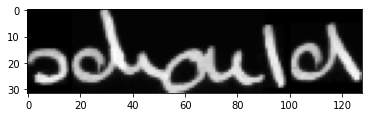



original_text =   the
predicted text = the

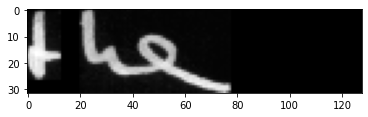



original_text =   should
predicted text = shoruld

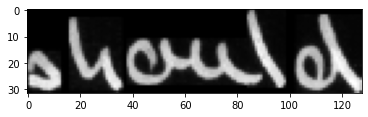



original_text =   prop
predicted text = prop

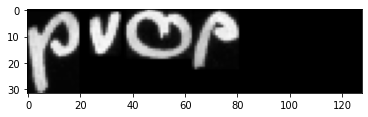



original_text =   likely
predicted text = Libely

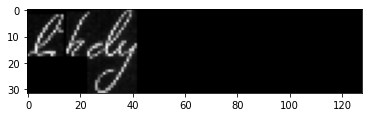



original_text =   ment
predicted text = ment

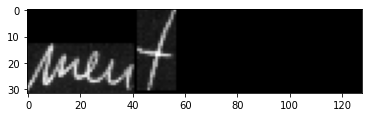



original_text =   should
predicted text = should

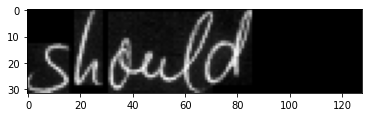



original_text =   the
predicted text = the

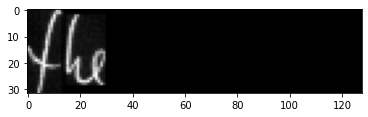



original_text =   should
predicted text = should

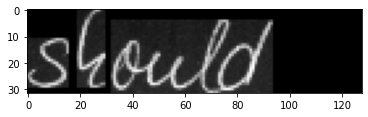



original_text =   prop
predicted text = prop

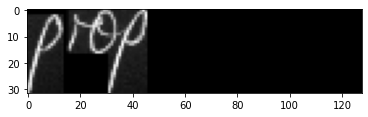



original_text =   13
predicted text = 1s

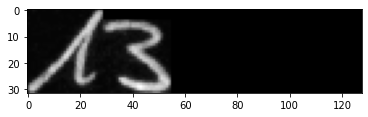



original_text =   Most
predicted text = Most

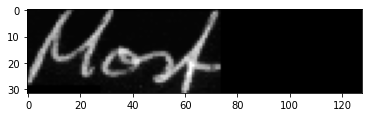



original_text =   the
predicted text = the

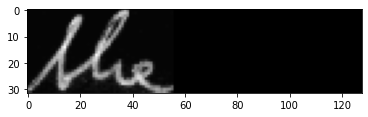



original_text =   has
predicted text = has

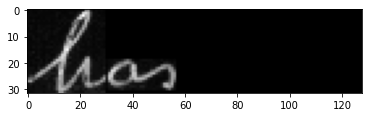



original_text =   two
predicted text = tuwo

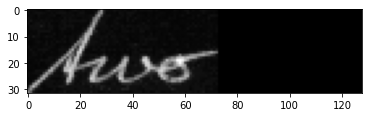



original_text =   to
predicted text = to

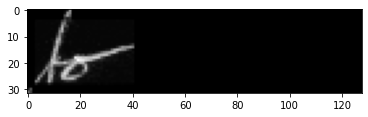



original_text =   Welensky
predicted text = Welensks

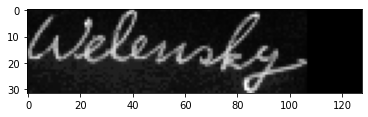



original_text =   Labour
predicted text = Labour

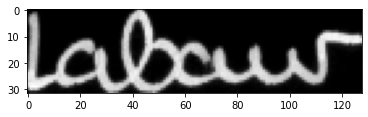



original_text =   Labour
predicted text = Labour

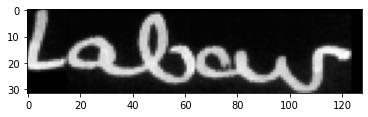



original_text =   of
predicted text = of

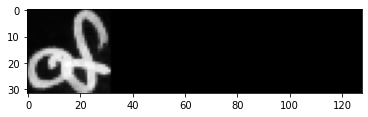



original_text =   have
predicted text = have

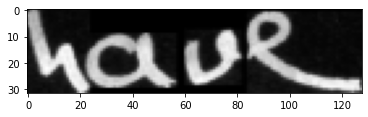



original_text =   African
predicted text = African

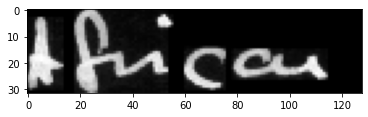



original_text =   together
predicted text = together

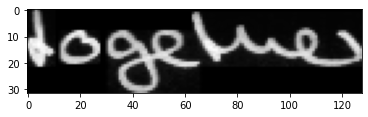



original_text =   the
predicted text = the

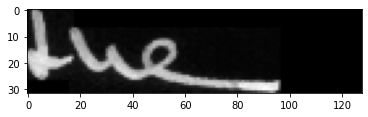



original_text =   Peers
predicted text = Peers

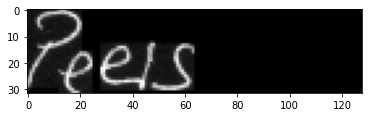

In [ ]:
#predict outputs on validation images
prediction = act_model.predict(valid_images[20:45])
 
#use CTC decoder
decoded = K.ctc_decode(prediction, input_length=np.ones(prediction.shape[0]) * prediction.shape[1], greedy=True)[0][0]
out = K.get_value(decoded)

for i, x in enumerate(out):
    print("original_text =  ", valid_original_text[20+i])
    print("predicted text = ", end = '')
    for p in x:
        if int(p) != -1:
            print(chars[int(p)], end = '')
    plt.imshow(valid_images[20+i].reshape(32,128), cmap=plt.cm.gray)
    plt.show()
    print('\n')